In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Algerian_Fire_Cleaned_Dataset.csv")

In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [5]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding the Categorical variables in Classes
df['Classes'] = df['Classes'].astype(str)
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [9]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Regions
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [10]:
## INDEPENDENT AND DEPENDENT FEATURES
X = df.drop('FWI', axis=1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Regions
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_text = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [14]:
# feature selection based on correalation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Regions
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


# Multicollinearity

<AxesSubplot: >

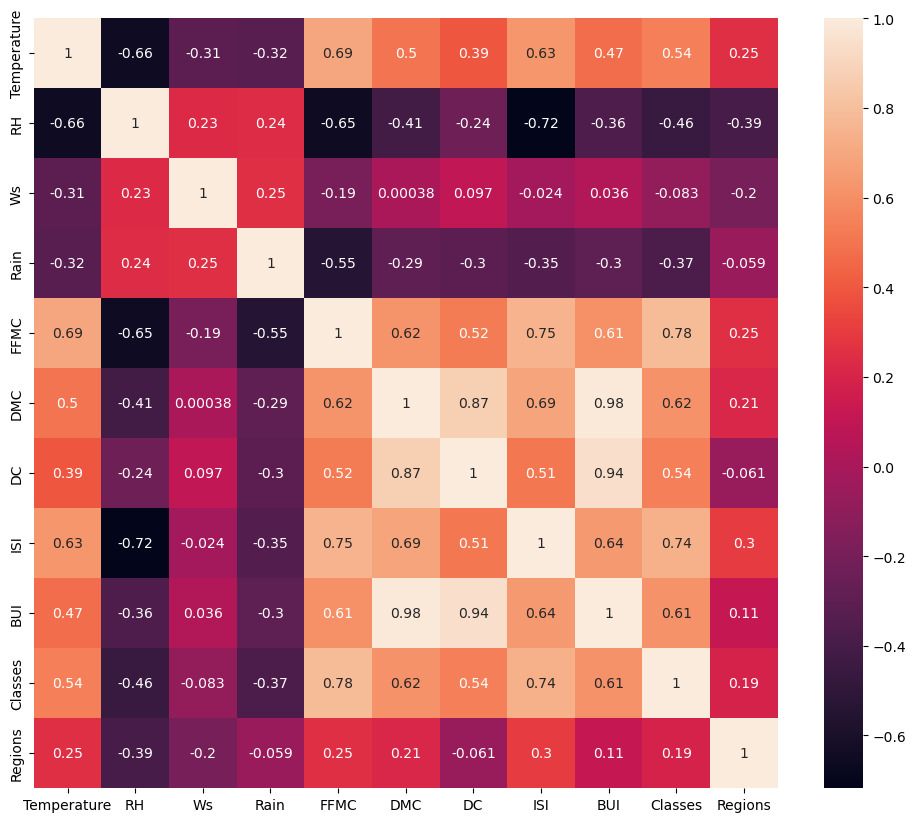

In [15]:
# Multicollinearity
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

### Get the column name which has multicollinearity

In [16]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
# Threashold -- set up by Domain Experts
correlation(X_train, 0.85)

{'BUI', 'DC'}

In [18]:
## Drop this features when correlation is more than .85
X_train.drop(['BUI', 'DC'], axis=1, inplace=True)
X_test.drop(['BUI', 'DC'],  axis = 1, inplace=True)

In [19]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Feature Scaling Standard Scaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Box plot understand the effect of Standard Scaler

/tmp/ipykernel_12478/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

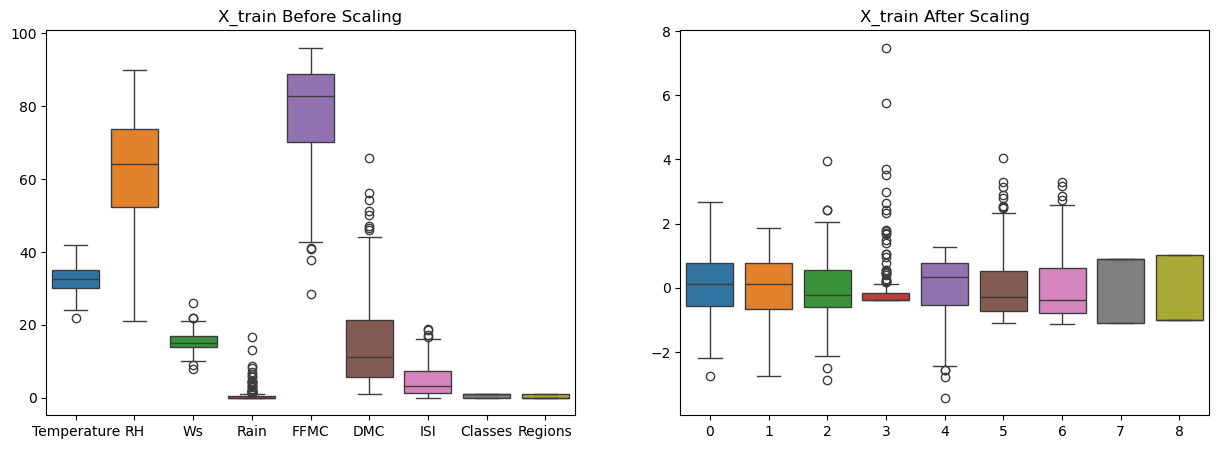

In [22]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
linear_model = LinearRegression()

In [24]:
# Train the model
linear_model.fit(X_train_scaled, y_train)


LinearRegression()

In [25]:
# Make Predict
y_pred = linear_model.predict(X_test_scaled)

In [26]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [27]:
# Find MAE, MSE, RMSE
mae = mean_absolute_error(y_text, y_pred)
mse = mean_squared_error(y_text, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error :", mae)
print("Mean Squared Errir :", mse)
print("Root Mean Squared Error :", rmse)

Mean Absolute Error : 0.5468236465249985
Mean Squared Errir : 0.6742766873791587
Root Mean Squared Error : 0.8211435242265256


In [28]:
# R2 Score

In [29]:
score = r2_score(y_text,y_pred)
print("R2 Score :", score)

R2 Score : 0.9847657384266951


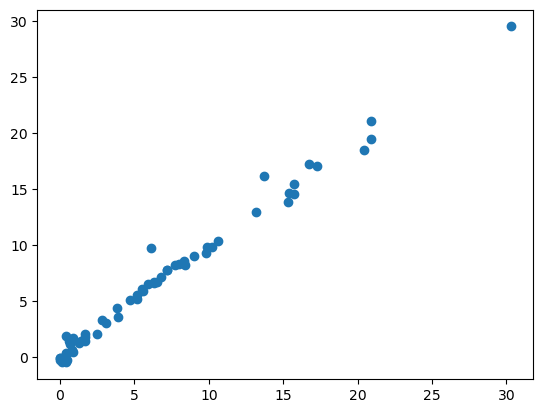

In [30]:
# Scatter Plot
plt.scatter(y_text, y_pred)

#### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mae = mean_absolute_error(y_text, ridge_pred)
ridge_score = r2_score(y_text, ridge_pred)

print("Mean Absolute Error :", ridge_mae)
print("Score :", ridge_score)

Mean Absolute Error : 0.5642305340105699
Score : 0.9842993364555513


#### Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mae = mean_absolute_error(y_text, lasso_pred)
lasso_score = r2_score(y_text, lasso_pred)

print("Mean Absolute Error :", lasso_mae)
print("Score :", lasso_score)

Mean Absolute Error : 1.1331759949144085
Score : 0.9492020263112388


#### ElasticNet Regression

In [33]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
elastic_net_pred = elastic_net.predict(X_test_scaled)
elastic_net_mae = mean_absolute_error(y_text, elastic_net_pred)
elastic_net_score = r2_score(y_text, elastic_net_pred)

print("Mean Absolute Error :", ridge_mae)
print("Score :", ridge_score)

Mean Absolute Error : 0.5642305340105699
Score : 0.9842993364555513


### Cross Validation Lasso

In [34]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [35]:
lassoCV.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [36]:
## Which alpha value got selected
lassoCV.alpha_

0.05725391318234411

In [37]:
## Aplha's value tried on
lassoCV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [38]:
lassoCV_pred = lassoCV.predict(X_test_scaled)

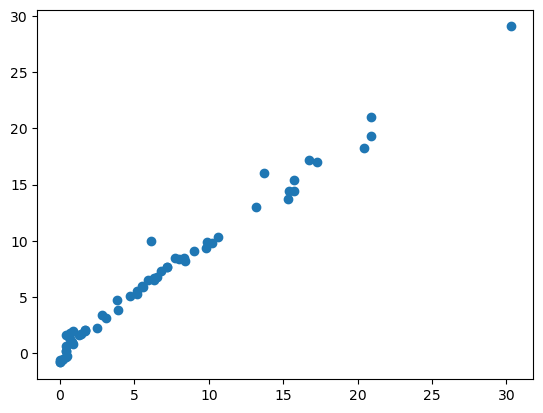

In [39]:
plt.scatter(y_text, lassoCV_pred)

### Ridge Regression Cross Validation

Mean Absolute Error For RidgeCV: 0.5642305340105699
Mean Squared Error For RidgeCV: 0.6949198918152061
Root Mean Squared Error For RidgeCV: 0.8211435242265256
R2 Score For RidgeCV: 0.9842993364555513


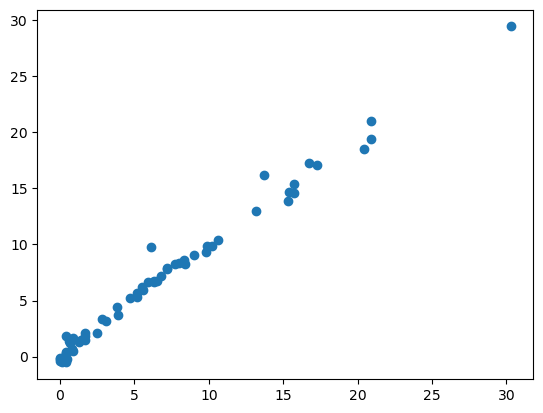

In [40]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled, y_train)
ridgeCV_pred = ridgeCV.predict(X_test_scaled)
plt.scatter(y_text, ridgeCV_pred)
ridgeCV_mae = mean_absolute_error(y_text, ridgeCV_pred)
ridgeCV_mse = mean_squared_error(y_text, ridgeCV_pred)
ridgeCV_rmse = np.sqrt(mse)
print("Mean Absolute Error For RidgeCV:", ridgeCV_mae)
print("Mean Squared Error For RidgeCV:", ridgeCV_mse)
print("Root Mean Squared Error For RidgeCV:", ridgeCV_rmse)
# Check Score
ridgeCV_r2_score = r2_score(y_text, ridgeCV_pred)
print("R2 Score For RidgeCV:", ridgeCV_r2_score)

In [41]:
ridgeCV.alpha_

1.0

### ElasticNET Cross Validation

Mean Absolute Error For ElasticNetCV: 0.65759467314309
Mean Squared Error For ElasticNetCV: 0.8222830416276264
Root Mean Squared Error For ElasticNetCV: 0.8211435242265256
R2 Score For ElasticNet CV: 0.9814217587854941


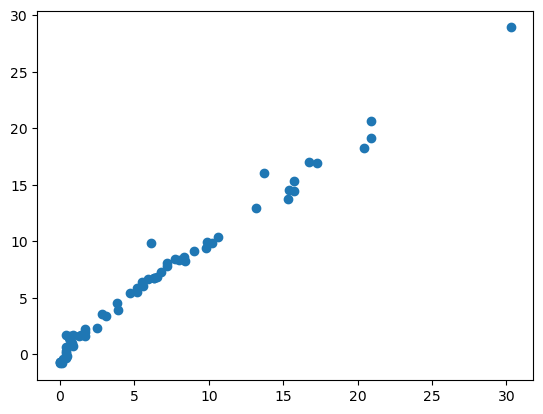

In [43]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv=5)
elasticNetCV.fit(X_train_scaled, y_train)
elasticNetCV_pred = elasticNetCV.predict(X_test_scaled)
plt.scatter(y_text, elasticNetCV_pred)
elasticNetCV_mae = mean_absolute_error(y_text, elasticNetCV_pred)
elasticNetCV_mse = mean_squared_error(y_text, elasticNetCV_pred)
elasticNetCV_rmse = np.sqrt(mse)
print("Mean Absolute Error For ElasticNetCV:", elasticNetCV_mae)
print("Mean Squared Error For ElasticNetCV:", elasticNetCV_mse)
print("Root Mean Squared Error For ElasticNetCV:", elasticNetCV_rmse)
# Check Score
ridgeCV_r2_score = r2_score(y_text, elasticNetCV_pred)
print("R2 Score For ElasticNet CV:", ridgeCV_r2_score)